# Pyteomics ms data reader

The tool is adapted from [Link to the Github](https://github.com/pymzml/pymzML)

The whole workflow should cite 

```
M Kösters, J Leufken, S Schulze, K Sugimoto, J Klein, R P Zahedi, M Hippler, S A Leidel, C Fufezan; pymzML v2.0: introducing a highly compressed and seekable gzip format, Bioinformatics, doi: https://doi.org/10.1093/bioinformatics/bty046
```

The Introduction is [Here](https://pyteomics.readthedocs.io/en/latest/data.html#mzml-and-mzxml)

In [50]:
import pyteomics
from pyteomics import mzml, auxiliary
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Read mzml files
f=mzml.MzML('20191210_MSpos_tl_frac_B7_F5_narrow_2_noSPE.mzML')

In [7]:
#The data structure is a mzml list contains scans as dictionary and titles
#Could iterate for the MS1/MS2 spectrums
#f[i] #where i is the index

#Get the scan time--Data structure is complex
f[0]['scanList']['scan'][0]['scan start time']

0.044816666667 minute

In [123]:
#By this way iteration works
#for i in range(len(f)):
#    if f[i]['ms level'] == 1:
#        print (f[i]['id'],f[i]['scanList']['scan'][0]['scan start time'])

In [9]:
#TIC plot
def tic_plot(spectrum):
    time=[]
    TIC=[]
    for i in range(len(spectrum)):
        time.append(spectrum[i]['scanList']['scan'][0]['scan start time'])
        TIC.append(spectrum[i]['total ion current'])
        
    plt.figure(figsize=(10,6))
    plt.plot(time,TIC)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('RT (min)')
    plt.ylabel('TIC')
    plt.title('TIC spectrum')
    plt.show()
    
    return

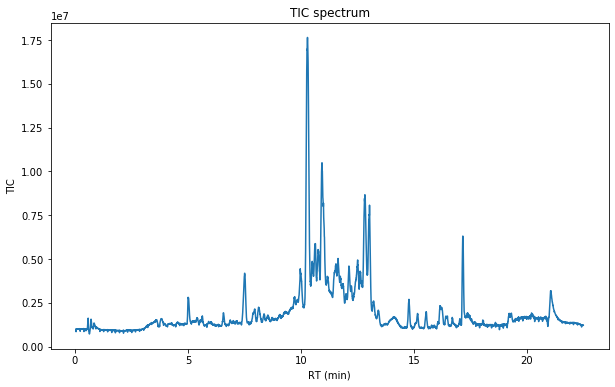

In [10]:
tic_plot(f)

In [11]:
peaklist=list(zip(f[0]['m/z array'],f[0]['intensity array']))

Text(0.5, 1.0, 'MS1 spectrum')

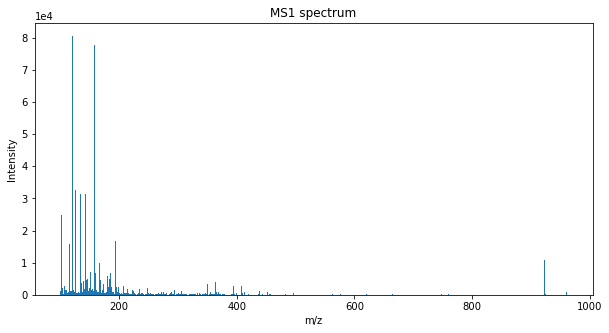

In [12]:
plt.figure(figsize=(10,5))
plt.bar(f[0]['m/z array'], f[0]['intensity array'],width = 1.0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('m/z')
plt.ylabel('Intensity')
plt.title('MS1 spectrum')

In [48]:
def rt_profiler(ms1_file):
    rt_dict = {}
    for index in range(len(ms1_file)):
        peaklist=list(zip(ms1_file[index]['m/z array'], ms1_file[index]['intensity array']))
        rt_dict.update({ms1_file[index]['scanList']['scan'][0]['scan start time'] : peaklist})
    
    return rt_dict

In [71]:
def mz_locator(input_list, mz, error):
    for i, mzs in enumerate(input_list):
        if math.isclose(mz, mzs, abs_tol = error):
            target_mz = mzs
            target_index = i
            break
        else:
            target_mz = 0
            target_index = 'NA'
    return target_mz, target_index

In [116]:
f[3000]['m/z array'][(f[3000]['m/z array']>299) & (f[3000]['m/z array']<300)]

array([299.17570695, 299.28875378, 299.36655601])

In [107]:
mz_locator(f[3000]['m/z array'], 206.99594932, 0.0001)

(206.99594932004572, 215)

In [120]:
def ms_chromatogram_list(ms_file, input_mz, error):
    retention_time = []
    intensity = []
    for i in range(len(ms_file)):
        #print(i)
        retention_time.append(ms_file[i]['scanList']['scan'][0]['scan start time'])
        
        target_mz, target_index = mz_locator(ms_file[i]['m/z array'], input_mz, error)
        if target_index == 'NA':
            intensity.append(0)
        else:
            intensity.append(ms_file[i]['intensity array'][target_index])
            
    return retention_time, intensity

In [118]:
rt, ints = ms_chromatogram_list(f, 299.17570695, 0.001)

In [124]:
def ms_chromatogram_plot(ms_file, input_mz, error):
    retention_time = []
    intensity = []
    for i in range(len(ms_file)):
        #print(i)
        retention_time.append(ms_file[i]['scanList']['scan'][0]['scan start time'])
        
        target_mz, target_index = mz_locator(ms_file[i]['m/z array'], input_mz, error)
        if target_index == 'NA':
            intensity.append(0)
        else:
            intensity.append(ms_file[i]['intensity array'][target_index])

    plt.figure(figsize=(10,5))
    plt.plot(retention_time, intensity)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('m/z')
    plt.ylabel('Intensity')
    plt.title('MS1 spectrum')
    plt.xlim(0,retention_time[-1])
    plt.ylim(0,)
    plt.show()
    
    return

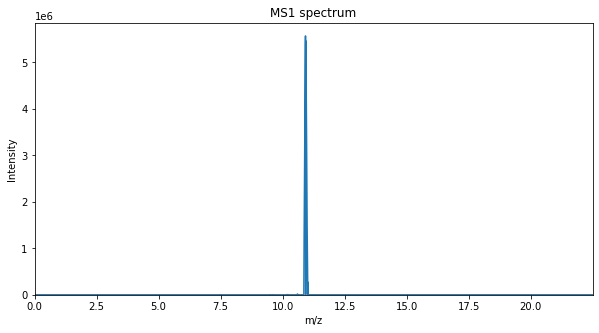

In [125]:
ms_chromatogram_plot(f, 299.17570695, 0.001)

In [127]:
test_mz = []
for i in range(len(f)):
    test_mz.append(f[i]['m/z array'])

In [138]:
from pandas.core.common import flatten
test_mz1 = list(flatten(test_mz))

In [139]:
len(test_mz1)

5852935

In [144]:
test_mz2 = list(set([test_mz1[i] for i in range(len(test_mz1))]))

In [145]:
len(test_mz2)

5850369